In [19]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

%matplotlib inline

### Mock Data

In [2]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Original Model from Ciriculum

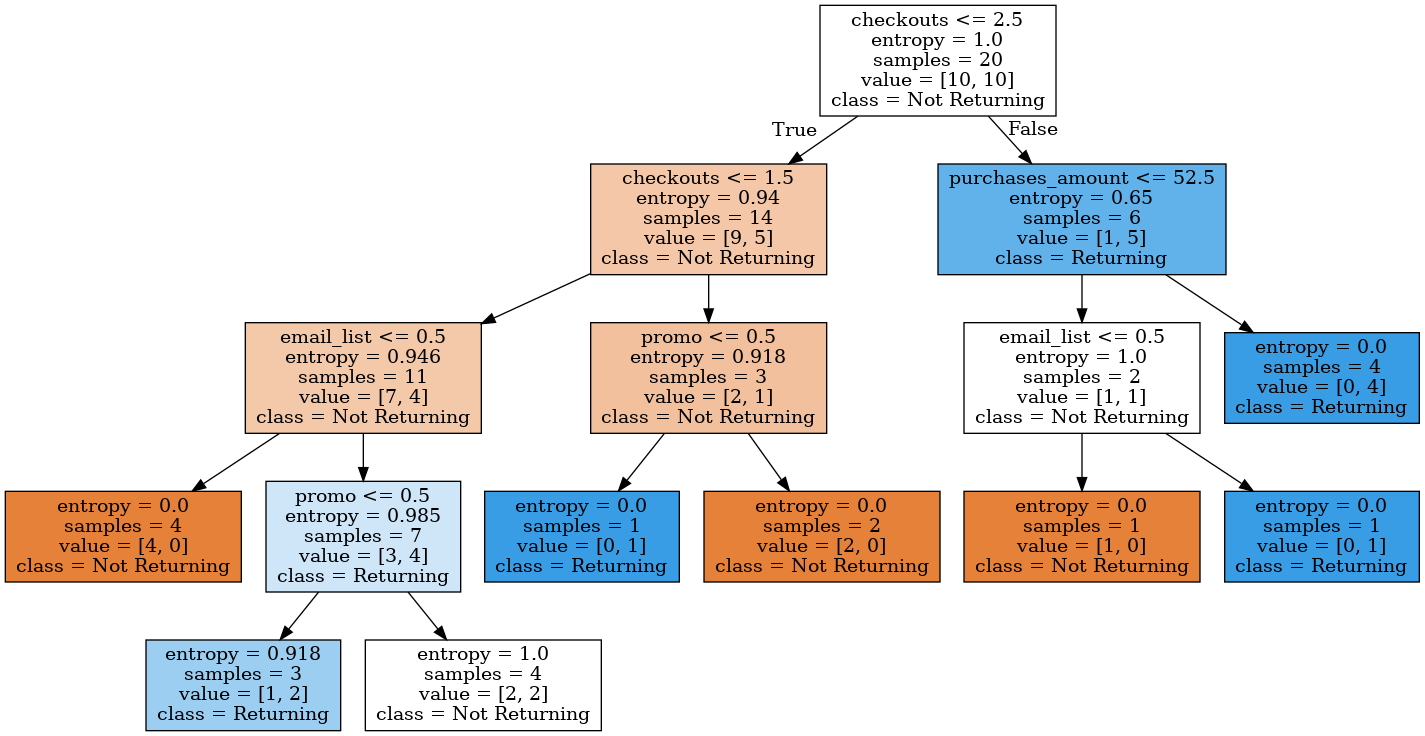

In [3]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### My Iterations

### 1

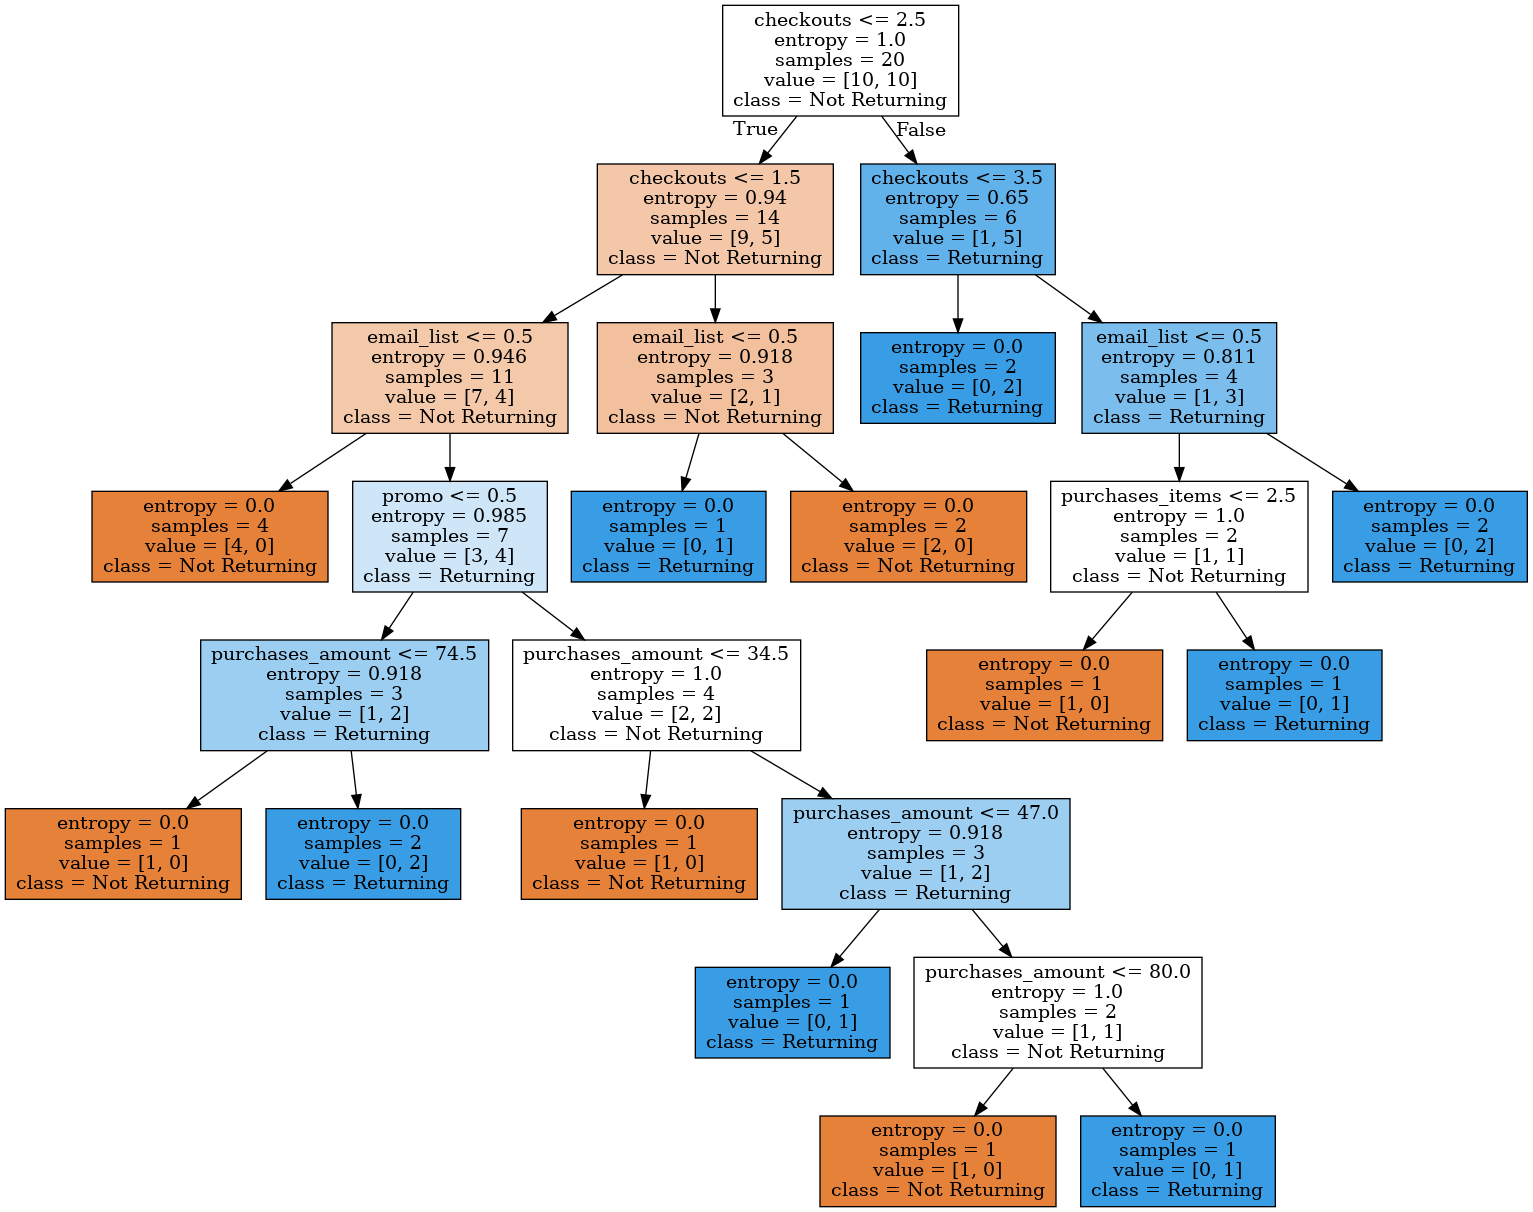

In [7]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 1,
    max_depth = 8, # double max depth
    random_state =1337 # keep the random state the same to best see how my changes impact the model
)
decision_tree.fit(customers, repeat_customer)


# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 2

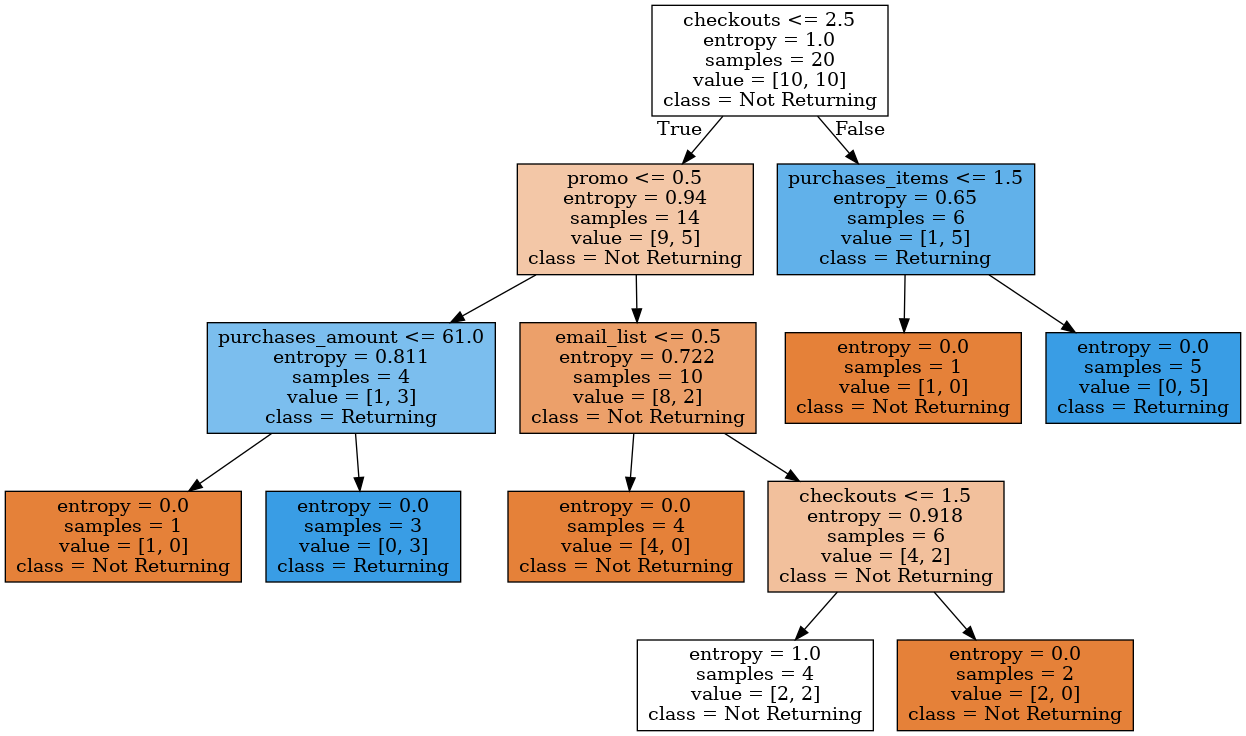

In [10]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2, # double the features
    max_depth=4,
    random_state = 1337 # keep the random state the same to best see how my changes impact the model
)
decision_tree.fit(customers, repeat_customer)



###


# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 3 Check the accuracy against the Diabetes dataset

In [32]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X = diabetes.data 
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1312)


# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4,
    random_state = 4123 # keep the random state the same to best see how my changes impact the model
)
decision_tree.fit(X_train, y_train)


print('Train score results: ', decision_tree.score(X_train, y_train), '\n', '=' * 22)
print ('Test score results: ', decision_tree.score(X_test, y_test))

Train score results:  0.08157099697885196 
Test score results:  0.009009009009009009


### 4 Tune the paramaters

Text(0.5, 1.0, 'Max Features')

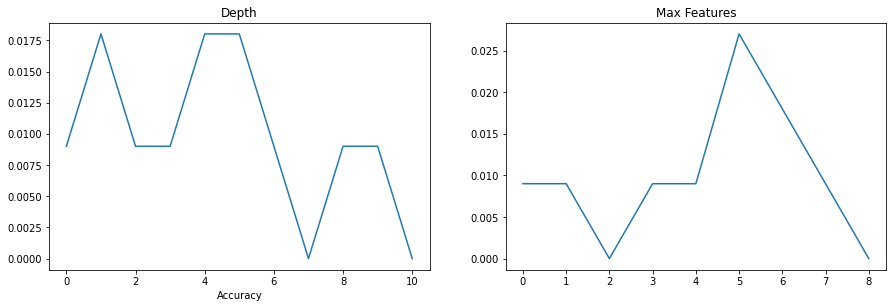

In [76]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X = diabetes.data 
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1312)
    
depth_scores = []
for depth in range(1,12):
    # Initialize and train our tree.
    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=1,
        max_depth=depth,
        random_state = 4123 # keep the random state the same to best see how my changes impact the model
    )
    decision_tree.fit(X_train, y_train)
    depth_scores.append(decision_tree.score(X_test, y_test))
    
    
features_scores = [] 
for feature in range(1,10):
    # Initialize and train our tree.
    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=feature,
        max_depth=9,
        random_state = 4123 # keep the random state the same to best see how my changes impact the model
    )
    decision_tree.fit(X_train, y_train)
    features_scores.append(decision_tree.score(X_test, y_test))
    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)
plt.plot(depth_scores)
plt.title('Depth')
plt.xlabel('Accuracy')

plt.subplot(2,2,2)
plt.plot(features_scores)
plt.title('Max Features')
#print('Train score results: ', decision_tree.score(X_train, y_train), '\n', '=' * 22)
#print ('Test score results: ', decision_tree.score(X_test, y_test))

### 5 Try a different dataset

In [80]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()
X = wine.data 
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1312)


# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 4123 # keep the random state the same to best see how my changes impact the model
)
decision_tree.fit(X_train, y_train)


print('Train score results: ', decision_tree.score(X_train, y_train), '\n', '=' * 22)
print ('Test score results: ', decision_tree.score(X_test, y_test))

Train score results:  0.924812030075188 
Test score results:  0.8222222222222222


### 6 Great scores before tuning. How good can we make it?

Text(0.5, 1.0, 'Max Features')

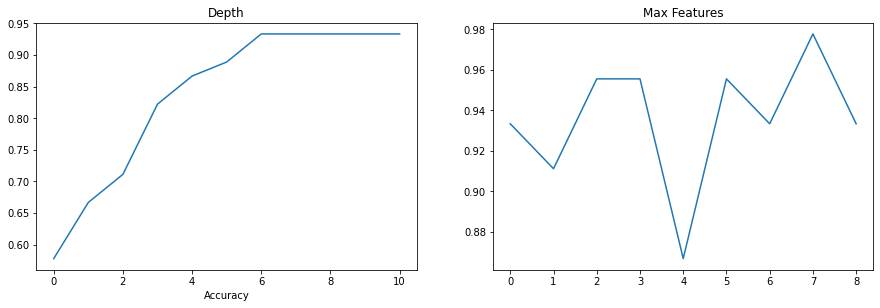

In [79]:

wine = load_wine()
X = wine.data 
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1312)


# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 4123 # keep the random state the same to best see how my changes impact the model
)
decision_tree.fit(X_train, y_train)


depth_scores = []
for depth in range(1,12):
    # Initialize and train our tree.
    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=1,
        max_depth=depth,
        random_state = 4123 # keep the random state the same to best see how my changes impact the model
    )
    decision_tree.fit(X_train, y_train)
    depth_scores.append(decision_tree.score(X_test, y_test))

features_scores = [] 
for feature in range(1,10):
    # Initialize and train our tree.
    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=feature,
        max_depth=9,
        random_state = 4123 # keep the random state the same to best see how my changes impact the model
    )
    decision_tree.fit(X_train, y_train)
    features_scores.append(decision_tree.score(X_test, y_test))
    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)
plt.plot(depth_scores)
plt.title('Depth')
plt.xlabel('Accuracy')

plt.subplot(2,2,2)
plt.plot(features_scores)
plt.title('Max Features')

In [82]:
wine = load_wine()
X = wine.data 
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1312)


# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=7,
    max_depth=8,
    random_state = 4123 # keep the random state the same to best see how my changes impact the model
)
decision_tree.fit(X_train, y_train)


print('Train score results: ', decision_tree.score(X_train, y_train), '\n', '=' * 22)
print ('Test score results: ', decision_tree.score(X_test, y_test))

Train score results:  1.0 
Test score results:  0.9333333333333333


In [86]:
from sklearn.model_selection import cross_val_score

cross_val_score(decision_tree, X_train, y_train, cv=5).mean()

0.9247863247863248

Not bad. 